In [1]:
import re
import string
import numpy as np
import pandas as pd
from tqdm.auto import tqdm
import nltk
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk import word_tokenize

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.graph_objs import *

import seaborn as sns

In [3]:
df = pd.read_json('cleaned_text_file.json', orient='records')
df.head(10)

,date_filed,plain_text,html,html_with_citations,label,cleaned_text
0,1773-09-01,None,"<p class=""case_cite"">1 U.S. 20</p>\r\n <p c...","<p class=""case_cite""><span class=""citation no-...",1700,1 U.S. 20 1 Dall. 20 1 L.Ed. 19 ANONYMOUS. No....
1,1773-04-01,None,"<p class=""case_cite"">1 U.S. 18</p>\r\n <p c...","<p class=""case_cite""><span class=""citation no-...",1700,1 U.S. 18 1 Dall. 18 1 L.Ed. 18 The Lessee of ...
2,1787-06-01,None,"<p class=""case_cite"">1 U.S. 194</p>\n <p cl...","<div>\n<center><b><span class=""citation no-lin...",1700,1 U.S. 194 (1787) 1 Dall. 194 GERARD versus L...
3,1787-09-01,None,"<p class=""case_cite"">1 U.S. 210</p>\r\n <p ...","<div>\n<center><b><span class=""citation no-lin...",1700,1 U.S. 210 (1787) 1 Dall. 210 POLLARD versus ...
4,1787-04-01,None,"<p class=""case_cite"">2 U.S. 97</p>\n <p cla...","<p class=""case_cite""><span class=""citation no-...",1700,2 U.S. 97 2 Dall. 97 1 L.Ed. 305 Pringlev.Blac...
5,1780-04-01,None,"<p class=""case_cite"">1 U.S. 47</p>\n <p cla...","<p class=""case_cite""><span class=""citation no-...",1700,1 U.S. 47 1 Dall. 47 1 L.Ed. 31 JAMES'S CLAIM....
6,1780-04-01,None,"<p class=""case_cite"">1 U.S. 49</p>\r\n <p c...","<div>\n<center><b><span class=""citation no-lin...",1700,1 U.S. 49 (1780) 1 Dall. 49 MONTGOMERY versus...
7,1789-09-01,None,"<p class=""case_cite"">1 U.S. 441</p>\n <p cl...","<p class=""case_cite""><span class=""citation no-...",1700,"1 U.S. 441 1 Dall. 441 1 L.Ed. 214 M'Cullough,..."
8,1789-01-01,None,"<p class=""case_cite"">1 U.S. 406</p>\n <p cl...","<p class=""case_cite""><span class=""citation no-...",1700,1 U.S. 406 1 Dall. 406 1 L.Ed. 197 Johnsonv.Ho...
9,1789-12-01,None,"<p class=""case_cite"">1 U.S. 480</p>\n <p cl...","<div>\n<center><b><span class=""citation no-lin...",1700,"1 U.S. 480 (1789) 1 Dall. 480 LYLE, Admor. ve..."


In [5]:
# Some Standard Text Cleaning Functions

def convert_to_lower(text):
    return text.lower()

def remove_numbers(text):
    number_pattern = r'\d+'
    without_number = re.sub(pattern=number_pattern, repl=" ", string=text)
    return without_number

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

def remove_stopwords(text):
    removed = []
    stop_words = list(stopwords.words("english"))
    tokens = word_tokenize(text)
    for i in range(len(tokens)):
        if tokens[i] not in stop_words:
            removed.append(tokens[i])
    return " ".join(removed)

In [6]:
from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas()

/var/folders/jt/_w07f41j0zz__hb4jz9bz0vh0000gp/T/ipykernel_9780/1383614074.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  from tqdm._tqdm_notebook import tqdm_notebook


In [7]:
df['cleaned_text'] = df['cleaned_text'].progress_apply(lambda x: convert_to_lower(x))
df['cleaned_text'] = df['cleaned_text'].progress_apply(lambda x: remove_numbers(x))
df['cleaned_text'] = df['cleaned_text'].progress_apply(lambda x: remove_punctuation(x))
df['cleaned_text'] = df['cleaned_text'].progress_apply(lambda x: remove_stopwords(x))

  0%|          | 0/61314 [00:00<?, ?it/s]

  0%|          | 0/61314 [00:00<?, ?it/s]

  0%|          | 0/61314 [00:00<?, ?it/s]

  0%|          | 0/61314 [00:00<?, ?it/s]

In [13]:
df['num_words'] = df['cleaned_text'].progress_apply(lambda x: len(x.split()))

  0%|          | 0/61314 [00:00<?, ?it/s]

In [16]:
df.head(25)

,date_filed,plain_text,html,html_with_citations,label,cleaned_text,text_length,num_words
0,1773-09-01,None,"<p class=""case_cite"">1 U.S. 20</p>\r\n <p c...","<p class=""case_cite""><span class=""citation no-...",1700,us dall led anonymous supreme court pennsylvan...,499,69
1,1773-04-01,None,"<p class=""case_cite"">1 U.S. 18</p>\r\n <p c...","<p class=""case_cite""><span class=""citation no-...",1700,us dall led lessee proprietaryvralston supreme...,1652,222
2,1787-06-01,None,"<p class=""case_cite"">1 U.S. 194</p>\n <p cl...","<div>\n<center><b><span class=""citation no-lin...",1700,us dall gerard versus la coste et al supreme c...,4243,586
3,1787-09-01,None,"<p class=""case_cite"">1 U.S. 210</p>\r\n <p ...","<div>\n<center><b><span class=""citation no-lin...",1700,us dall pollard versus shaaffer supreme court ...,8914,1274
4,1787-04-01,None,"<p class=""case_cite"">2 U.S. 97</p>\n <p cla...","<p class=""case_cite""><span class=""citation no-...",1700,us dall led pringlevblacks executors supreme c...,564,77
5,1780-04-01,None,"<p class=""case_cite"">1 U.S. 47</p>\n <p cla...","<p class=""case_cite""><span class=""citation no-...",1700,us dall led jamess claim april term us dall le...,1559,234
6,1780-04-01,None,"<p class=""case_cite"">1 U.S. 49</p>\r\n <p c...","<div>\n<center><b><span class=""citation no-lin...",1700,us dall montgomery versus henry et al supreme ...,3411,462
7,1789-09-01,None,"<p class=""case_cite"">1 U.S. 441</p>\n <p cl...","<p class=""case_cite""><span class=""citation no-...",1700,us dall led mcullough asigneevhouston supreme ...,5416,719
8,1789-01-01,None,"<p class=""case_cite"">1 U.S. 406</p>\n <p cl...","<p class=""case_cite""><span class=""citation no-...",1700,us dall led johnsonvhocker supreme court penns...,5852,809
9,1789-12-01,None,"<p class=""case_cite"">1 U.S. 480</p>\n <p cl...","<div>\n<center><b><span class=""citation no-lin...",1700,us dall lyle admor versus foreman supreme cour...,554,68


In [17]:
fig = px.histogram(df,
    x=df.index,
    y='num_words',
    nbins=100,
    color='label',
    template='plotly_white')
fig.update_layout(
    title={'text': "Lengths of the Text Opinions (minus punctuation, numbers, stopwords)",
    'x': 0.5,
    'xanchor': 'center'})
fig.update_yaxes(title='Text Lengths')
fig.update_xaxes(showticksuffix="none")
fig.show()

<AxesSubplot:>

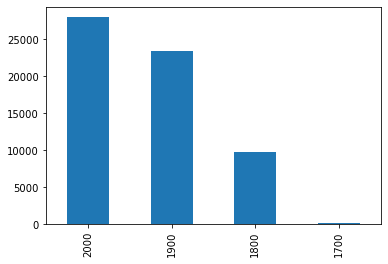

In [18]:
df['label'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='Frequency'>

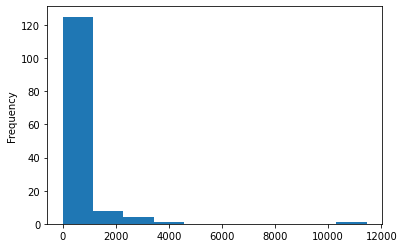

In [25]:
df_1700_num_words = df.query('label == 1700')['num_words']
df_1700_num_words.plot(kind='hist')

In [ ]:
df_for_training = df[['date_filed', 'label', 'cleaned_text']]
df_for_training.to_json('training_dataframe.json', orient='records')